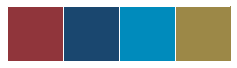

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

the_economist = ['#90353B', '#1A476F', '#008BBC', '#9C8847']
sns.palplot(sns.color_palette(the_economist))

In [177]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')
diamonds = sns.load_dataset('diamonds')

category = tips.select_dtypes('category')
numeric = tips._get_numeric_data()

# Univariate plots

## Categorical

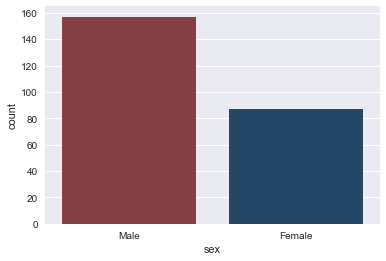

In [185]:
sns.countplot(x='sex', data=tips, palette=sns.color_palette(the_economist))

## Numerical

/Users/summerlight/pythonenv/jupyterlab/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


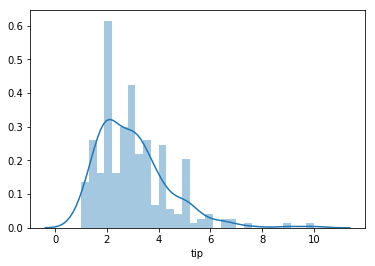

In [68]:
sns.distplot(tips['tip'],bins=30)

# Bivariate plots

## Categorical & categorical

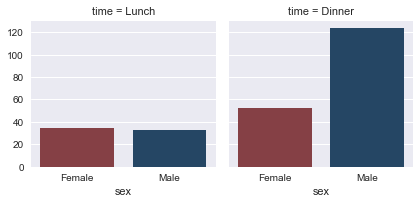

In [98]:
# Simple - bucket + sub-bucket
g = sns.FacetGrid(tips, col="time")
g.map(sns.countplot, 'sex', order=tips['sex'].unique() ,palette=sns.color_palette(the_economist))

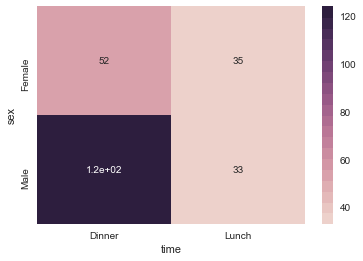

In [168]:
# Simple - count matrix
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.cubehelix_palette(20).as_hex())
sns.heatmap(pd.crosstab(tips['sex'], tips['time']), annot=True, cmap=cmap)

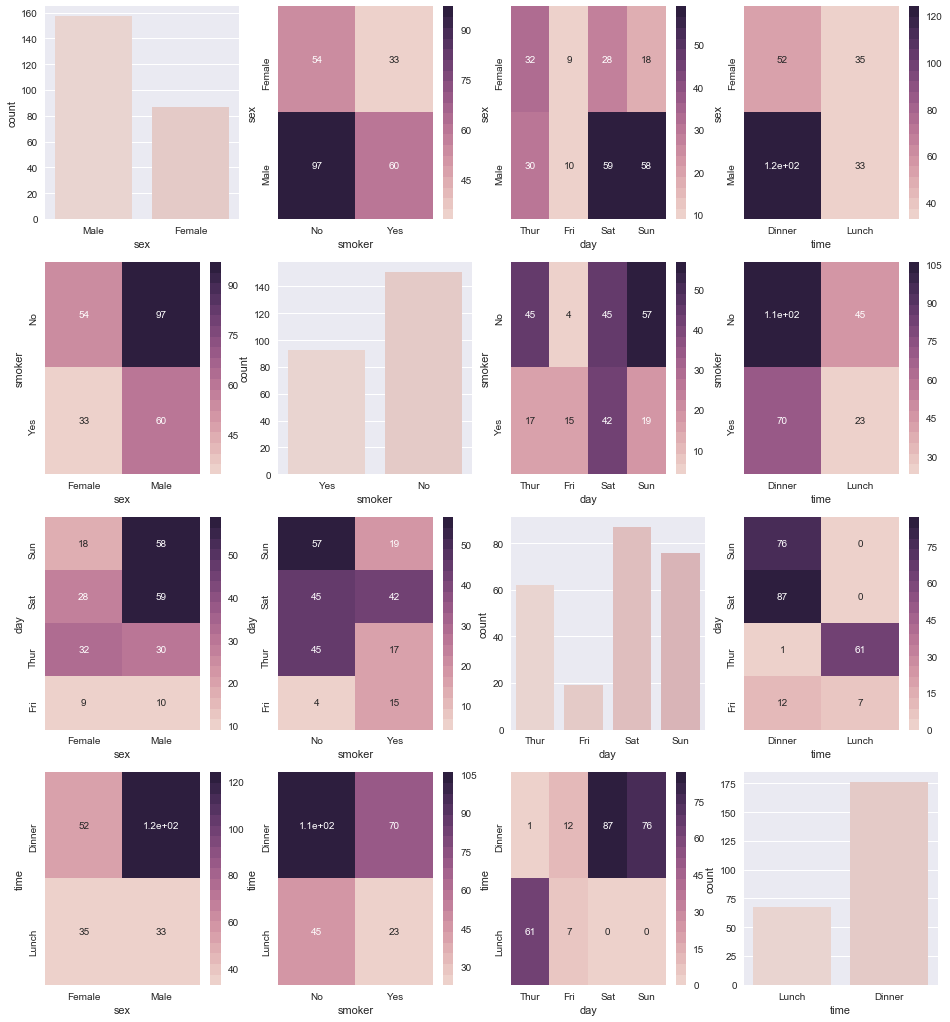

In [241]:
# Compact
fig = plt.figure(figsize=(16, 18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(1, category.columns.size + 1):
    for j in range(1, category.columns.size + 1):
        index = 4 * (i-1) + j
        ax = fig.add_subplot(4, 4, index)
        if (i != j):
            sns.heatmap(pd.crosstab(category.iloc[:,i-1], category.iloc[:,j-1]), annot=True, cmap=cmap)
        else:
            sns.countplot(x=category.columns[i-1], data=category, palette=sns.cubehelix_palette(20))

In [145]:
# Compact
#agg_count = tips.groupby([i for i in category.columns]).count().reset_index()
#g = sns.PairGrid(tips, y_vars=category.columns, x_vars=category.columns)
#g.map(sns.heatmap, cmap='plasma')

## Categorical & numerical

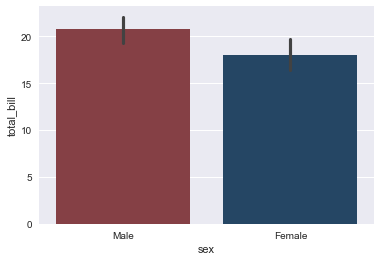

In [146]:
# Simple - bar
sns.barplot(x='sex', y='total_bill', data=tips,palette=sns.color_palette(the_economist))

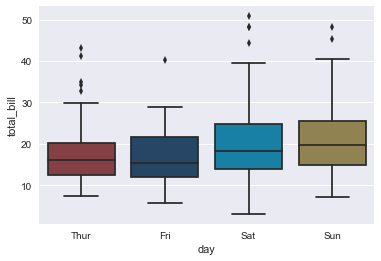

In [147]:
# Simple - boxplot
sns.boxplot(x='day',y='total_bill', data=tips, palette=sns.color_palette(the_economist))

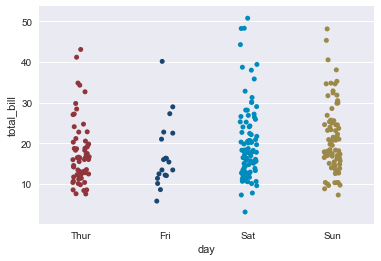

In [148]:
# Simple - stripplot
sns.stripplot(x='day',y='total_bill',data=tips,palette=sns.color_palette(the_economist), jitter=True)

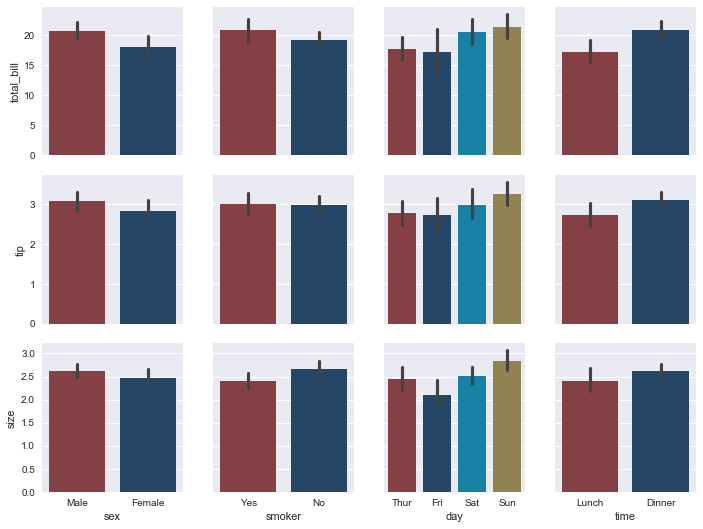

In [149]:
# Compact
g = sns.PairGrid(tips, y_vars=numeric.columns, x_vars=category.columns)
g.map(sns.barplot, palette=sns.color_palette(the_economist))

# Numerical & numerical

/Users/summerlight/pythonenv/jupyterlab/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


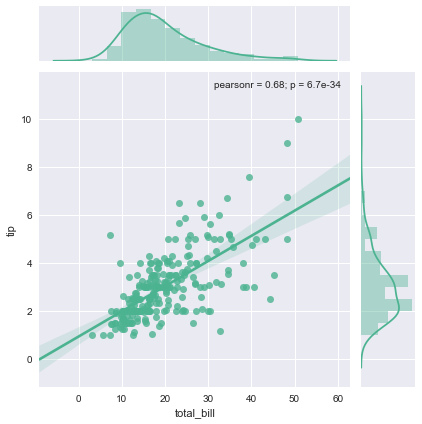

In [162]:
# Simple
sns.jointplot(x='total_bill', y='tip', data=tips, color="#4CB391",kind='reg')

/Users/summerlight/pythonenv/jupyterlab/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


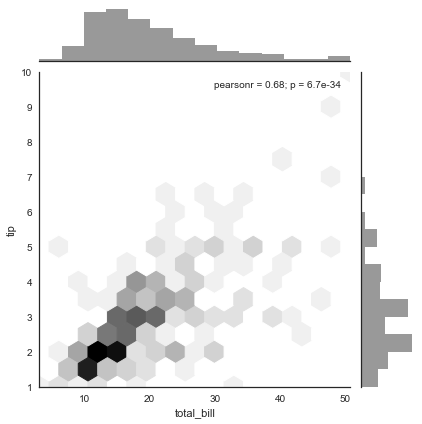

In [152]:
with sns.axes_style("white"):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex", color="k")

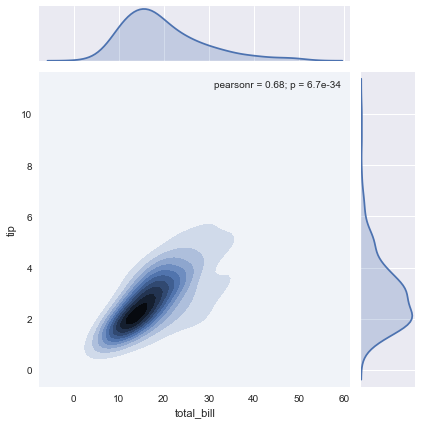

In [167]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind="kde");

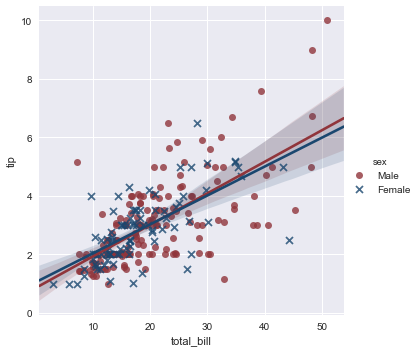

In [157]:
# Simple - regression plot
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',
           palette=sns.color_palette(the_economist),markers=['o','x'])

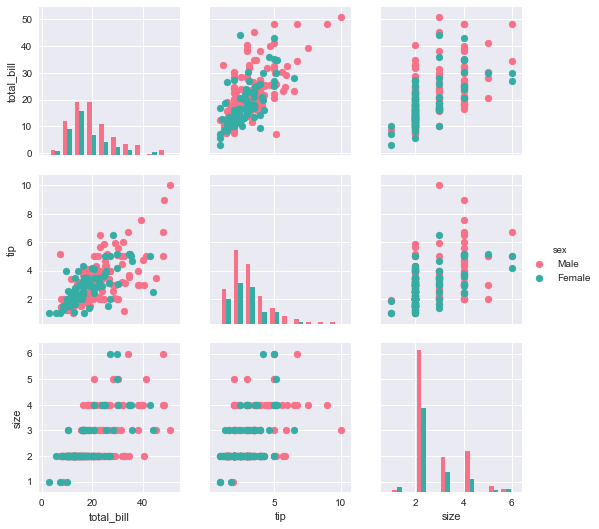

In [169]:
# Compact - detailed
g = sns.PairGrid(tips, hue="sex", palette="husl")
g = g.map_upper(plt.scatter)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, histtype='bar')
g = g.add_legend()

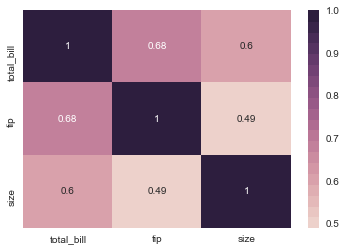

In [170]:
# Compact - correlation heatmap
tc = tips.corr()

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.cubehelix_palette(20).as_hex())
sns.heatmap(tc, cmap=cmap,annot=True,linecolor='#FFFFFF')

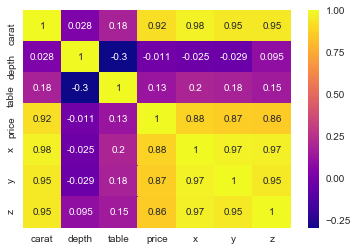

In [187]:
dc = diamonds.corr()
sns.heatmap(dc, annot=True, cmap='plasma')

# Others

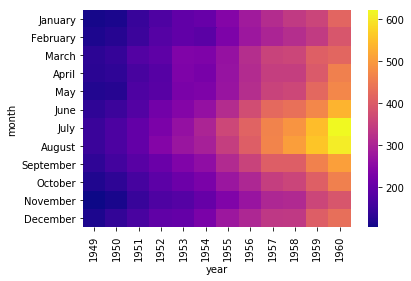

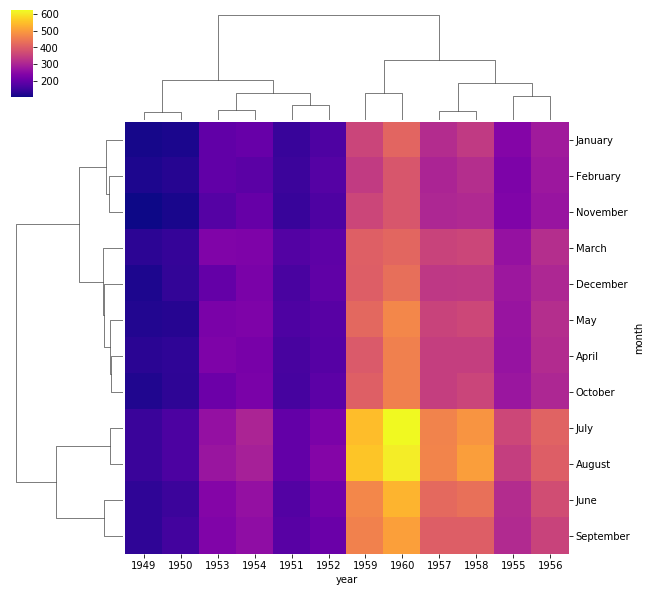

In [20]:
fm = flights.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(fm, cmap='plasma')
sns.clustermap(fm, cmap='plasma')